# Business Problem 


Bir e-ticaret şirketi müşterilerini segmentlere ayırıp bu segmentlere göre pazarlama stratejileri belirlemek istiyor.

Buna yönelik olarak müşterilerin davranışlarını tanımlayacağız ve bu davranışlarda öbeklenmelere göre gruplar oluşturacağız.

Yani ortak davranışlar sergileyenleri aynı gruplara alacağız ve bu gruplara özel satış ve pazarlama teknikleri geliştirmeye çalışacağız.

**Veri Seti Hikayesi**

https://archive.ics.uci.edu/ml/datasets/Online+Retail+II

Online Retail II isimli veri seti İngiltere merkezli online bir satış mağazasının 01/12/2009 - 09/12/2011 tarihleri arasındaki satışlarını içeriyor.Biz 2010-2011 yılları arasında çalışacağız.

Bu şirket hediyelik eşya satıyor. Promosyon ürünleri gibi düşünebilir.

Müşterilerinin çoğu da toptancı.

**Değişkenler**

- InvoiceNo: Fatura numarası. Her işleme yani faturaya ait eşsiz numara. Eğer bu kod C ile başlıyorsa işlemin iptal edildiğini ifade eder.
- StockCode: Ürün kodu. Her bir ürün için eşsiz numara.
- Description: Ürün ismi
- Quantity: Ürün adedi. Faturalardaki ürünlerden kaçar tane satıldığını ifade etmektedir.
- InvoiceDate: Fatura tarihi ve zamanı. 
- UnitPrice: Ürün fiyatı (Sterlin cinsinden)
- CustomerID: Eşsiz müşteri numarası
- Country: Ülke ismi. Müşterinin yaşadığı ülke.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

# to display all columns and rows:
pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None);

#virgulden sonra gösterilecek olan sayı sayısı
pd.set_option('display.float_format', lambda x: '%.0f' % x)
import matplotlib.pyplot as plt

In [4]:
#Veriyi okuma
df_2010_2011 = pd.read_excel("../input/uci-online-retail-ii-data-set/online_retail_II.xlsx", sheet_name = "Year 2010-2011")

In [5]:
#Verinin kopyasını alma
df = df_2010_2011.copy()

In [6]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,3,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,3,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3,17850,United Kingdom


# Data Understanding

In [7]:
#essiz urun sayisi, kac musteri var, vs...
df.nunique()

Invoice        25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
Price           1630
Customer ID     4372
Country           38
dtype: int64

In [8]:
#hangi urunden kacar tane var?
df["Description"].value_counts().head()

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
Name: Description, dtype: int64

In [9]:
#en cok siparis edilen urun hangisi, sıralama ile birlite?
df.groupby("Description").agg({"Quantity":"sum"}).sort_values("Quantity", ascending = False).head()

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
JUMBO BAG RED RETROSPOT,47363
ASSORTED COLOUR BIRD ORNAMENT,36381
POPCORN HOLDER,36334
PACK OF 72 RETROSPOT CAKE CASES,36039


In [10]:
#TotalPrice değişkeni oluşturduk.Toplam harcamalar için.
df["TotalPrice"] = df["Quantity"]*df["Price"]

In [11]:
df.groupby("Invoice").agg({"TotalPrice":"sum"}).head()

,TotalPrice
Invoice,
536365,139
536366,22
536367,279
536368,70
536369,18


In [12]:
#hangi ulkeden kac siparis geldi?
df["Country"].value_counts().head()

United Kingdom    495478
Germany             9495
France              8558
EIRE                8196
Spain               2533
Name: Country, dtype: int64

In [13]:
#hangi ulke ne kadar kazandırdı?
df.groupby("Country").agg({"TotalPrice":"sum"}).sort_values("TotalPrice", ascending = False).head()

,TotalPrice
Country,
United Kingdom,8187806
Netherlands,284662
EIRE,263277
Germany,221698
France,197422


# Check Missing Values

In [14]:
#Kaç tane eksik değerimiz var?
df.isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
TotalPrice          0
dtype: int64

In [15]:
#Yukarıdaki çıktıya göre StockCode u belli olan 1454 ürünün Description ı eksik.
#Bunları düzeltebilir miyiz diye merak ediyorum ve bulmaya çalışıyorum.

In [16]:
#Öncelikle eksik olan değerlerin Stockcode unu bulmam gerekiyor.
df_eksik_desc = df[df["Description"].isnull()][["StockCode"]]
df_eksik_desc.head()

,StockCode
622,22139
1510,21134
1985,37509
1986,22145
2022,20950


In [17]:
df_eksik_desc.size

1454

In [18]:
#Şimdi bulduğumuz bu StockCode ların kaçı eşsiz ona bakalım.
df_eksik_desc.nunique()

StockCode    960
dtype: int64

In [19]:
#Burda tekrarlayan kayıtları siliyorum.
df_eksik_desc.drop_duplicates(inplace=True) 

In [20]:
df_eksik_desc.size

960

In [21]:
df_eksik_desc.head()

,StockCode
622,22139
1510,21134
1985,37509
1986,22145
2022,20950


In [22]:
#Yukarıda bulduğumuz sonuç Description ı eksik StockCode u belli 633 değer olduğunu gösteriyor.
#Bu değerlerden birisini ele alalım.
df[df["StockCode"]==22139].head(20)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
106,536381,22139,RETROSPOT TEA SET CERAMIC 11 PC,23,2010-12-01 09:41:00,4,15311,United Kingdom,98
622,536414,22139,NaN,56,2010-12-01 11:52:00,0,nan,United Kingdom,0
6392,536942,22139,amazon,15,2010-12-03 12:08:00,0,nan,United Kingdom,0
6885,536982,22139,RETROSPOT TEA SET CERAMIC 11 PC,10,2010-12-03 14:27:00,11,nan,United Kingdom,110
7202,537011,22139,NaN,-5,2010-12-03 15:38:00,0,nan,United Kingdom,-0
14908,537624,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2010-12-07 14:41:00,5,12748,United Kingdom,5
15018,537633,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2010-12-07 15:14:00,5,nan,United Kingdom,5
15033,537634,22139,RETROSPOT TEA SET CERAMIC 11 PC,2,2010-12-07 15:15:00,5,16775,United Kingdom,10
17368,537754,22139,RETROSPOT TEA SET CERAMIC 11 PC,2,2010-12-08 11:16:00,5,16081,United Kingdom,10
19890,537900,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2010-12-09 10:45:00,5,15983,United Kingdom,5


In [23]:
#Yukarıdaki tablodan çıkardığım  bazı sonuçlar.
#1-Descriptionu bir gözlemde olupta başka bir gözlemde olmayan değerler var.Burada eksik değerler doldurulabilir.
#2-StockCode u aynı olup, descriptionu tamamen farklı olan bir değer var.(3. satırdaki amazon değeri)
#3-Aynı tarihlerde farklı fiyata satılan aynı ürün.İndirim ve ya kampanya olarak değerlendiremeyiz.Aynı ülkelere.
#4-Bazı gözlemlerde price 0.İadelerde bile price yazıyor.
#5-Invoice u C ile başlamayan buna rağmen eksi değerde Quantity var.
#Burada çoğunluğa göre hareket edip eksik olan değerleri Descriptiona göre dolduracağız. 

In [ ]:
#Uzun süreli bir işlem.
#RFM için gereksiz ama ürünler bazında yapılması gereken bir işlem
dongu_uzunlugu = len(df_eksik_desc["StockCode"])
sayac = 0
for i in df_eksik_desc["StockCode"]:
    if(len(df[df["StockCode"]==i]["Description"].value_counts())>0): #Eğer StockCode u ile Descriptionu eşleşiyorsa
        a = df[df["StockCode"]==i]["Description"].value_counts().index[0]  #En çok olan değeri alıyoruz.
        df.loc[(df["StockCode"]==i) & (df["Description"]!=a),"Description"] = a  #eksik verilere atıyoruz.
    print(str(dongu_uzunlugu - sayac - 1 )+" deger kaldi")
    sayac += 1   

In [ ]:
#Baslama saati 11.52
#Yarısı        13.22
#Bitis saati   15.04
#Geriye bulamayacağımız kaç eksik değer oldugunu görüyoruz.112 değer bulunamayacak şekilde gözüküyor

In [ ]:
#Geriye bulamayacağımız kaç eksik değer oldugunu görüyoruz.112 değeri en son silicez.
df.isnull().sum()

In [24]:
#Şimdi ise CustomerId leri eksik olan Invoice lerini (Fatura no) bulup buna göre belirlemeye çalışagız.
df_eksik_cust = df[df["Customer ID"].isnull()][["Invoice"]]
df_eksik_cust.head()

,Invoice
622,536414
1443,536544
1444,536544
1445,536544
1446,536544


In [25]:
df_eksik_cust.size

135080

In [26]:
df_eksik_cust.nunique()

Invoice    3710
dtype: int64

In [27]:
#Burda tekrarlayan kayıtları siliyorum.
df_eksik_cust.drop_duplicates(inplace=True) 

In [28]:
df_eksik_cust.size

3710

In [29]:
df_eksik_cust.head()

,Invoice
622,536414
1443,536544
1510,536545
1985,536547
1986,536546


In [ ]:
#Uzun süreli
#Burada Customer ID si boş olan Invoice lerde yapısal bozukluk olabilir mi diye kontrol ettim.
toplam = 0
for i in df_eksik_cust["Invoice"]:
    if(len(df[df["Invoice"]==i]["Customer ID"].value_counts())>0): #Eğer Invoice u ile Customer ID ile eşleşiyorsa
        toplam += 1 
print(toplam)

In [ ]:
df.shape

In [30]:
#Şimdi eksik olan değerleri Customer ID özelinde siliyoruz.
#Description eksik olması RFM için bir anlam ifade etmiyor.
df.dropna(subset= ["Customer ID"],inplace= True)

In [31]:
#Zaten Description daki eksik değerler de bunun içinde.
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
TotalPrice     0
dtype: int64

In [32]:
df.shape

(406830, 9)

In [33]:
#Invoice değeri C ile başlayan iade anlamına gelen değerleri siliyoruz.
sil =  df[df["Invoice"].str.contains("C", na=False)].index
df = df.drop(sil, axis=0)

In [34]:
df.shape

(397925, 9)

In [35]:
#Son olarak iade olmadığı halde Quantity değeri eksi olan değerleri siliyoruz.
sil_q = df[~df['Quantity'] > 0].index
df = df.drop(sil_q, axis=0)

In [36]:
#Burada değişim olmamasının nedeni bu değerlerin demek ki eksik değerlerle birlikte silinmesidir.
df.shape

(397925, 9)

# Data Preparation

In [37]:
df.describe([0.01,0.05,0.10,0.25,0.50,0.75,0.90,0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
Quantity,397925,13,180,1,1,1,1,2,6,12,24,36,120,80995
Price,397925,3,22,0,0,0,1,1,2,4,6,8,15,8143
Customer ID,397925,15294,1713,12346,12415,12627,12883,13969,15159,16795,17725,17912,18211,18287
TotalPrice,397925,22,309,0,1,1,2,5,12,20,35,68,202,168470


In [38]:
#Kaç aykırı değer olduğunu gösteriyor.
for feature in ["Quantity","Price","TotalPrice"]:

    Q1 = df[feature].quantile(0.01)
    Q3 = df[feature].quantile(0.99)
    IQR = Q3-Q1
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR

    if df[(df[feature] > upper) | (df[feature] < lower)].any(axis=None):
        print(feature,"yes")
        print(df[(df[feature] > upper) | (df[feature] < lower)].shape[0])
    else:
        print(feature, "no")

Quantity yes
963
Price yes
661
TotalPrice yes
903


# RFM Skorları ile Müşteri Segmentasyonu

Recency, Frequency, Monetary ifadelerinin baş harflerinden oluşur.

Müşterilerin satın alma alışkanlıkları üzerinden pazarlama ve satış stratejileri belirlemeye yardımcı olan bir tekniktir.

- Recency (yenilik): Müşterinin son satın almasından bugüne kadar geçen süre

    -- Diğer bir ifadesiyle “Müşterinin son temasından bugüne kadar geçen süre” dir.

    -- Bugünün tarihi - Son satın alma

    -- Örnek verecek olursak bugün bu analizi yapıyorsak bugünün tarihi - son 	ürün satın alma tarihi.

    -- Bu örneğin 20 olabilir 100 olabilir. Biliriz ki 20 olan müşteri daha sıcaktır. Daha son zamanlarda bizimle teması olmuştur.

- Frequency (Sıklık): Toplam satın alma sayısı.

- Monetary (Parasal Değer): Müşterinin yaptığı toplam harcama.

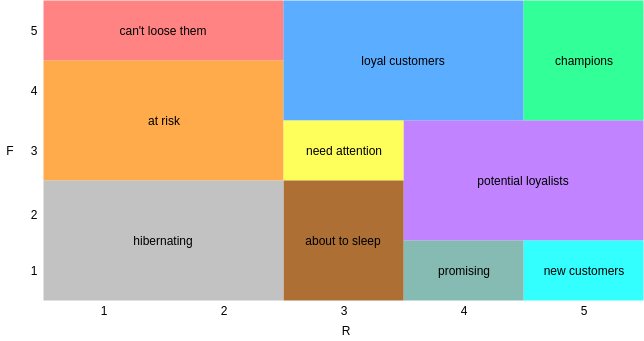

- Yukarıda görülen tablo 2 bouytlu sadece R ve F değerlerini göstersede burda yapılacak olan işlem R, F ve M değerlerini 5 e bölmek ve ona göre müşterileri sınıflandırmak.

-- Recency değeri 1 olan daha uzak tarihte, 5 olan daha yakın tarihte alışveriş yapan müşteri sayılabilir.

-- Frequency değeri 1 olan az sıklıkta, 5 olan çok sıklıkta alışveriş yapan müşteri sayılabilir.

-- Monetary değeri 1 olan toplamda daha az harcama yapan, 5 olan ise daha çok harcama yapan müşteri sayılabilir.

In [39]:
#Verileri düzenledikten sonra oluşan son tablonun özet bilgileri
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397925 entries, 0 to 541909
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      397925 non-null  object        
 1   StockCode    397925 non-null  object        
 2   Description  397925 non-null  object        
 3   Quantity     397925 non-null  int64         
 4   InvoiceDate  397925 non-null  datetime64[ns]
 5   Price        397925 non-null  float64       
 6   Customer ID  397925 non-null  float64       
 7   Country      397925 non-null  object        
 8   TotalPrice   397925 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB


In [40]:
#Yapılan ilk alışveriş tarihi
df["InvoiceDate"].min()

Timestamp('2010-12-01 08:26:00')

In [41]:
#Yapılan son alışveriş tarihi
df["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [42]:
#Recency değeri belirlemek için bugunun tarihini alıyoruz.
import datetime as dt
today_date = dt.datetime(2011,12,10)

In [43]:
df.groupby("Customer ID").agg({"InvoiceDate":"max"}).head()

,InvoiceDate
Customer ID,
12346,2011-01-18 10:01:00
12347,2011-12-07 15:52:00
12348,2011-09-25 13:13:00
12349,2011-11-21 09:51:00
12350,2011-02-02 16:01:00


In [44]:
#Su an her bir müşterinin son alışveriş tarihleri elimizde.
df["Customer ID"] = df["Customer ID"].astype(int)

In [45]:
#Recency değeri için bugunun tarihi ile verimizdeki tarihleri çıkardık.
temp_df = (today_date - df.groupby("Customer ID").agg({"InvoiceDate":"max"}))

In [46]:
temp_df.rename(columns={"InvoiceDate": "Recency"}, inplace = True)

In [47]:
temp_df.head()

,Recency
Customer ID,
12346,325 days 13:59:00
12347,2 days 08:08:00
12348,75 days 10:47:00
12349,18 days 14:09:00
12350,310 days 07:59:00


# Recency

In [48]:
#Sadece günler ile işlem yapacağımız için sadece günleri tutuyoruz.
recency_df = temp_df["Recency"].apply(lambda x: x.days)

In [49]:
recency_df.head()

Customer ID
12346    325
12347      2
12348     75
12349     18
12350    310
Name: Recency, dtype: int64

# Frequency

In [50]:
#Bir kullanıcının her bir faturasının içinde kaç ürün olduğu
temp_df = df.groupby(["Customer ID","Invoice"]).agg({"Invoice":"count"})

In [51]:
temp_df.head()

Invoice
Customer ID Invoice         
12346       541431         1
12347       537626        31
            542237        29
            549222        24
            556201        18

In [52]:
#Burda ise kullanıcının kaç faturası olduğu
temp_df.groupby("Customer ID").agg({"Invoice":"count"}).head()

,Invoice
Customer ID,
12346,1
12347,7
12348,4
12349,1
12350,1


In [53]:
freq_df = temp_df.groupby("Customer ID").agg({"Invoice":"count"})
freq_df.rename(columns={"Invoice": "Frequency"}, inplace = True)
freq_df.head()

,Frequency
Customer ID,
12346,1
12347,7
12348,4
12349,1
12350,1


# Monetary

In [54]:
#Kişinin ne kadar harcama yaptığı
monetary_df = df.groupby("Customer ID").agg({"TotalPrice":"sum"})

In [55]:
monetary_df.head()

,TotalPrice
Customer ID,
12346,77184
12347,4310
12348,1797
12349,1758
12350,334


In [56]:
monetary_df.rename(columns={"TotalPrice": "Monetary"}, inplace = True)

In [57]:
print(recency_df.shape,freq_df.shape,monetary_df.shape)

(4339,) (4339, 1) (4339, 1)


In [58]:
rfm = pd.concat([recency_df, freq_df, monetary_df],  axis=1)

In [59]:
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346,325,1,77184
12347,2,7,4310
12348,75,4,1797
12349,18,1,1758
12350,310,1,334


# KNN ile Sınıflandırma

In [60]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning)

In [61]:
sc = MinMaxScaler((0,1))

In [62]:
df = sc.fit_transform(rfm)

In [63]:
df

array([[8.71313673e-01, 0.00000000e+00, 2.75453040e-01],
       [5.36193029e-03, 2.87081340e-02, 1.53815396e-02],
       [2.01072386e-01, 1.43540670e-02, 6.41399496e-03],
       ...,
       [1.87667560e-02, 4.78468900e-03, 6.35425320e-04],
       [8.04289544e-03, 7.17703349e-02, 7.47621339e-03],
       [1.12600536e-01, 9.56937799e-03, 6.55688982e-03]])

In [64]:
kmeans = KMeans(n_clusters = 8)

In [65]:
k_fit = kmeans.fit(df)

In [66]:
k_fit.n_clusters

8

In [67]:
k_fit.cluster_centers_

array([[0.11393801, 0.01071727, 0.00452734],
       [0.90890721, 0.00178533, 0.00239114],
       [0.36506319, 0.00616541, 0.00293886],
       [0.2155261 , 0.00801591, 0.00372909],
       [0.03206328, 0.02706676, 0.00976841],
       [0.0146336 , 0.33133971, 0.31406886],
       [0.70303155, 0.00165624, 0.00202612],
       [0.52359013, 0.00413925, 0.00242055]])

In [68]:
k_fit.labels_

array([1, 4, 3, ..., 4, 4, 0], dtype=int32)

# Optimum Küme Sayısının Belirlenmesi

In [69]:
kmeans = KMeans(n_clusters = 8)
k_fit = kmeans.fit(df)

In [70]:
ssd = []

K = range(1,30)

for k in K:
    kmeans = KMeans(n_clusters = k).fit(df)
    ssd.append(kmeans.inertia_)

In [71]:
ssd

[322.2054834062645,
 74.14134839800758,
 40.85375944150037,
 27.17789747628181,
 20.585656627947174,
 16.091052009095407,
 12.745105855847449,
 10.873313138166688,
 9.508256383900044,
 8.242658045064886,
 7.054114030576743,
 6.028552150993629,
 5.305575860140947,
 4.682698750718803,
 4.141668066803004,
 3.7965800797583134,
 3.48820771692339,
 3.2825061704365335,
 2.98220630953622,
 2.816354980552331,
 2.576210332126714,
 2.482203371078287,
 2.273759709550868,
 2.2015392119617543,
 2.0612417308010174,
 1.9323317237333284,
 1.8822262551432323,
 1.813042180031812,
 1.7243655382636982]

Text(0.5, 1.0, 'Optimum Küme sayısı için Elbow Yöntemi')

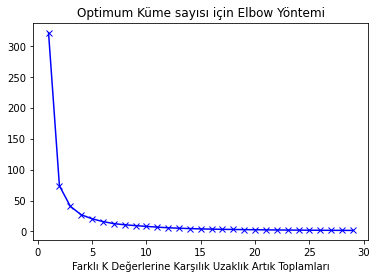

In [72]:
plt.plot(K, ssd, "bx-")
plt.xlabel("Farklı K Değerlerine Karşılık Uzaklık Artık Toplamları")
plt.title("Optimum Küme sayısı için Elbow Yöntemi")

In [73]:
from yellowbrick.cluster import KElbowVisualizer

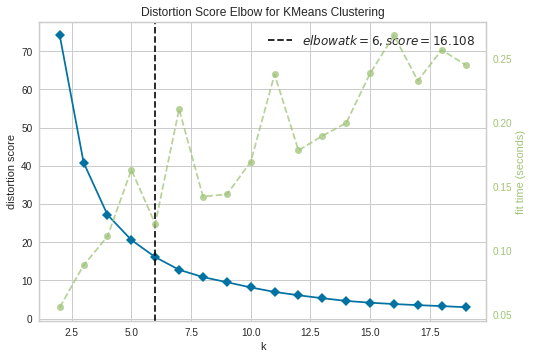

In [74]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,20))
visu.fit(df)
visu.poof();

In [75]:
kmeans = KMeans(n_clusters = 6).fit(df)
kmeans
kumeler = kmeans.labels_

In [76]:
kumeler

array([2, 0, 3, ..., 0, 0, 0], dtype=int32)

In [77]:
rfm = pd.concat([recency_df, freq_df, monetary_df],  axis=1)

In [78]:
pd.DataFrame({"Musteri": rfm.index, "Kumeler": kumeler})

,Musteri,Kumeler
0,12346,2
1,12347,0
2,12348,3
3,12349,0
4,12350,2
5,12352,0
6,12353,1
7,12354,4
8,12355,4
9,12356,0


# RFM ve KNN Karşılaştırması

RFM de 10 ayrı sınıfa ayırmıştık müşterileri ve bunları sadece Recency ve Frequency değerlerine göre yapmıştık.Şimdi KNN ile aynısını yapıp karşılaştıracağız.

In [81]:
rfm["RecencyScore"] = pd.qcut(rfm['Recency'], 5, labels = [5, 4, 3, 2, 1])
rfm["FrequencyScore"] = pd.qcut(rfm['Frequency'].rank(method="first"), 5, labels = [1, 2, 3, 4, 5])
rfm["MonetaryScore"] = pd.qcut(rfm['Monetary'], 5, labels = [1, 2, 3, 4, 5])

In [82]:
rfm["RFM_SCORE"] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str) + rfm['MonetaryScore'].astype(str)

In [83]:
#Sınıflandırmaya yarayan regex değişkeni
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

In [84]:
rfm['Segment'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str)
rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
Customer ID,,,,,,,,
12346,325,1,77184,1,1,5,115,Hibernating
12347,2,7,4310,5,5,5,555,Champions
12348,75,4,1797,2,4,4,244,At Risk
12349,18,1,1758,4,1,4,414,Promising
12350,310,1,334,1,1,2,112,Hibernating


## Yukarıdaki tablo bizim RF skoruna göre ayırdığımız segmentleri göstiyor

In [102]:
# Df miz zaten scale edilmiş durumda
df

array([[8.71313673e-01, 0.00000000e+00, 2.75453040e-01],
       [5.36193029e-03, 2.87081340e-02, 1.53815396e-02],
       [2.01072386e-01, 1.43540670e-02, 6.41399496e-03],
       ...,
       [1.87667560e-02, 4.78468900e-03, 6.35425320e-04],
       [8.04289544e-03, 7.17703349e-02, 7.47621339e-03],
       [1.12600536e-01, 9.56937799e-03, 6.55688982e-03]])

In [103]:
kmeans = KMeans(n_clusters = 10)

In [104]:
k_fit = kmeans.fit(df)

In [105]:
kumeler = k_fit.labels_